In [1]:
#  to present any diagrams inline with the rest of the notebook as opposed to in new browser window
%matplotlib inline 

# importing necessary modules
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from scipy.stats import norm
from scipy import stats, integrate
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict, cross_val_score


path_to_csv = "data/abalone.csv"
default_figure_out_path = 'figs/'
default_figure_ext = '.png'

In [2]:
df = pd.read_csv(path_to_csv, names=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight','viscera_weight', 'shell_weight','rings'], header=None)

In [3]:
df['rings'] = pd.to_numeric(df['rings'], errors='coerce')
nan_error = df.isnull().any(axis=1)
below_or_zero=df[df <= 0.0 ].count()
error_diameter=df['diameter'] <= 0.0
error_height = df['height'] <= 0.0
shucked_error =df['shucked_weight'] > df['whole_weight']
df[shucked_error]
df[df['viscera_weight'] > df['whole_weight']]
shell_error = df['shell_weight'] > df['whole_weight']
df.drop(df.index[(shucked_error) | (error_diameter) | (error_height) | (nan_error)], inplace=True)

In [4]:
q1 = df['rings'].quantile(0.25)
q3 = df['rings'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 + 1.5 * iqr
q1, q3, iqr, lw, uw

outliers = (df['rings'] < lw) | (df['rings'] > uw) #6.67 % of the dataset
pre_outliers_removal_df_count = df['sex'].count()
df['rings'][~outliers].count()
removed_rings = df['rings'][outliers]
df.drop(df.index[outliers], inplace=True)
removed_rings.count(), df.count()

(278, sex               3888
 length            3888
 diameter          3888
 height            3888
 whole_weight      3888
 shucked_weight    3888
 viscera_weight    3888
 shell_weight      3888
 rings             3888
 dtype: int64)

In [5]:
q1 = df['whole_weight'].quantile(0.25)
q3 = df['whole_weight'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr

uw = q3 + 1.5 * iqr
#q1, q3, iqr, lw, uw
outliers = (df['whole_weight'] < lw) | (df['whole_weight'] > uw)
df['whole_weight'][outliers].count()
removed_whole_weight = df['whole_weight'][outliers]
df.drop(df.index[outliers], inplace=True)
removed_whole_weight.count(),df.count()

(31, sex               3857
 length            3857
 diameter          3857
 height            3857
 whole_weight      3857
 shucked_weight    3857
 viscera_weight    3857
 shell_weight      3857
 rings             3857
 dtype: int64)

In [6]:
q1 = df['length'].quantile(0.25)
q3 = df['length'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr

uw = q3 + 1.5 * iqr
#q1, q3, iqr, lw, uw
outliers = (df['length'] < lw) | (df['length'] > uw)
df['length'][outliers].count()
removed_length = df['length'][outliers]
df.drop(df.index[outliers], inplace=True)
removed_length.count(), df.count()

(30, sex               3827
 length            3827
 diameter          3827
 height            3827
 whole_weight      3827
 shucked_weight    3827
 viscera_weight    3827
 shell_weight      3827
 rings             3827
 dtype: int64)

In [7]:
q1 = df['diameter'].quantile(0.25)
q3 = df['diameter'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr

uw = q3 + 1.5 * iqr
#q1, q3, iqr, lw, uw
outliers = (df['diameter'] < lw) | (df['diameter'] > uw)
df['diameter'][outliers].count()
removed_diameter = df['diameter'][outliers]
df.drop(df.index[outliers], inplace=True)
removed_diameter.count(), df.count()

(7, sex               3820
 length            3820
 diameter          3820
 height            3820
 whole_weight      3820
 shucked_weight    3820
 viscera_weight    3820
 shell_weight      3820
 rings             3820
 dtype: int64)

In [8]:
q1 = df['height'].quantile(0.25)
q3 = df['height'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr

uw = q3 + 1.5 * iqr
#q1, q3, iqr, lw, uw
outliers = (df['height'] < lw) | (df['height'] > uw)
df['height'][outliers].count()
removed_height = df['height'][outliers]
df.drop(df.index[outliers], inplace=True)
removed_height.count(), df.count()

(3, sex               3817
 length            3817
 diameter          3817
 height            3817
 whole_weight      3817
 shucked_weight    3817
 viscera_weight    3817
 shell_weight      3817
 rings             3817
 dtype: int64)

In [9]:
q1 = df['shucked_weight'].quantile(0.25)
q3 = df['shucked_weight'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr

uw = q3 + 1.5 * iqr
#q1, q3, iqr, lw, uw
outliers = (df['shucked_weight'] < lw) | (df['shucked_weight'] > uw)
df['shucked_weight'][outliers].count()
removed_shucked_weight = df['shucked_weight'][outliers]
df.drop(df.index[outliers], inplace=True)
removed_shucked_weight.count(), df.count()

(20, sex               3797
 length            3797
 diameter          3797
 height            3797
 whole_weight      3797
 shucked_weight    3797
 viscera_weight    3797
 shell_weight      3797
 rings             3797
 dtype: int64)

In [10]:
q1 = df['viscera_weight'].quantile(0.25)
q3 = df['viscera_weight'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr

uw = q3 + 1.5 * iqr
#q1, q3, iqr, lw, uw
outliers = (df['viscera_weight'] < lw) | (df['viscera_weight'] > uw)
df['viscera_weight'][outliers].count()
removed_viscera_weight = df['viscera_weight'][outliers]
df.drop(df.index[outliers], inplace=True)
removed_viscera_weight.count(), df.count()

(16, sex               3781
 length            3781
 diameter          3781
 height            3781
 whole_weight      3781
 shucked_weight    3781
 viscera_weight    3781
 shell_weight      3781
 rings             3781
 dtype: int64)

In [11]:
q1 = df['shell_weight'].quantile(0.25)
q3 = df['shell_weight'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr

uw = q3 + 1.5 * iqr
#q1, q3, iqr, lw, uw
outliers = (df['shell_weight'] < lw) | (df['shell_weight'] > uw)
df['shell_weight'][outliers].count()
removed_shell_weight = df['shell_weight'][outliers]
df.drop(df.index[outliers], inplace=True)
removed_shell_weight.count(), df.count()

(11, sex               3770
 length            3770
 diameter          3770
 height            3770
 whole_weight      3770
 shucked_weight    3770
 viscera_weight    3770
 shell_weight      3770
 rings             3770
 dtype: int64)

In [12]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [85]:
def create_histogram(data, color, kde=False):
    sb.set(rc={'figure.figsize':(11,8)})
    sb.distplot(data, color=color, kde=kde)

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

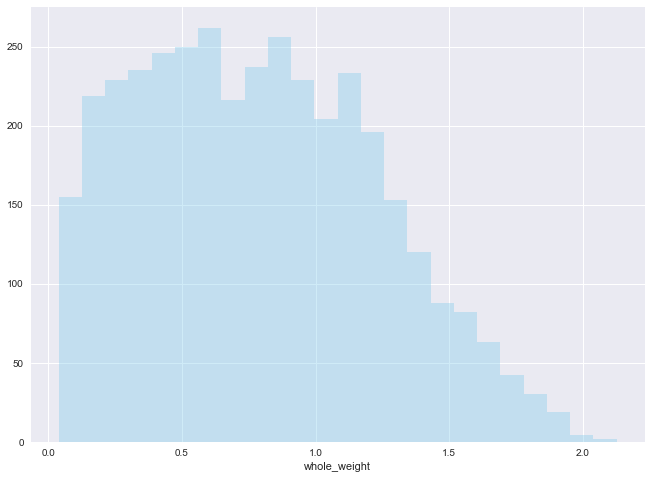

In [73]:
create_histogram(df["whole_weight"] , color="skyblue")

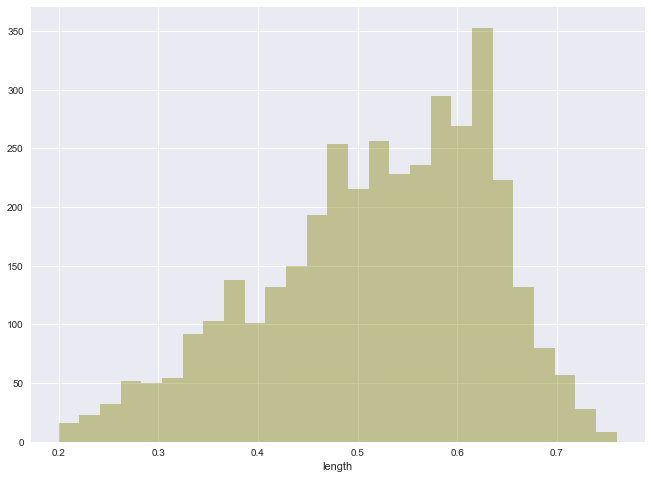

In [74]:
create_histogram(df["length"] , color="olive")

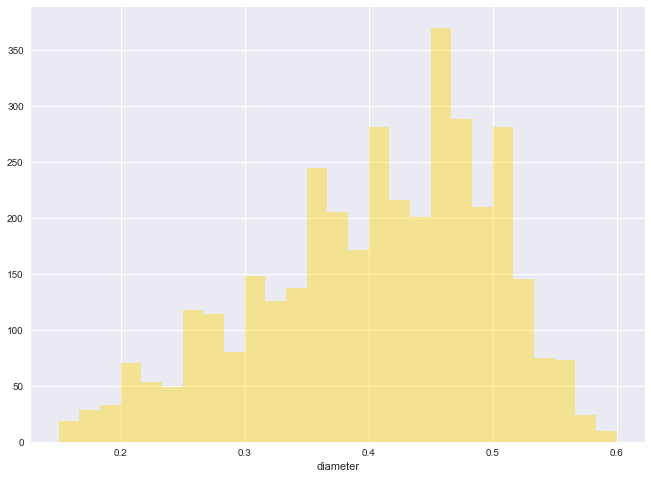

In [75]:
create_histogram( df["diameter"] , color="gold")

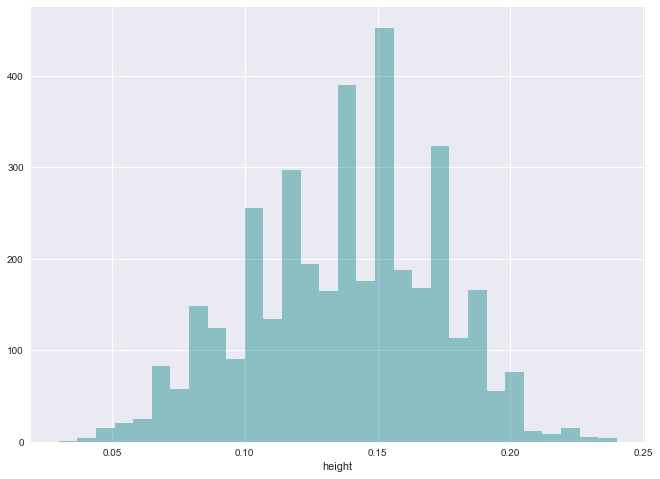

In [77]:
create_histogram(df['height'], color="teal")

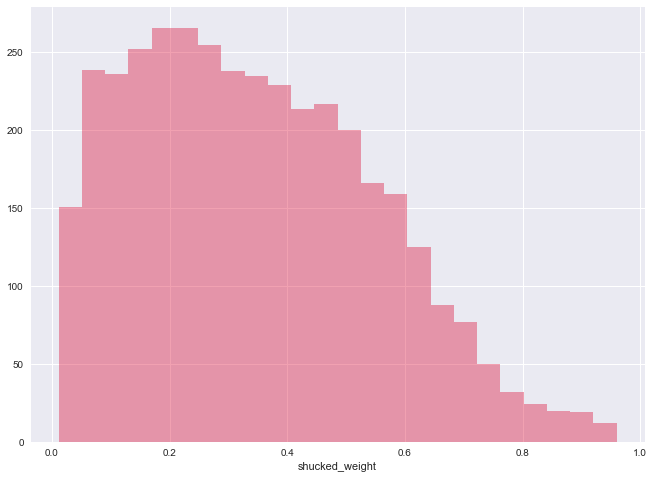

In [97]:
create_histogram(df['shucked_weight'], color='crimson')

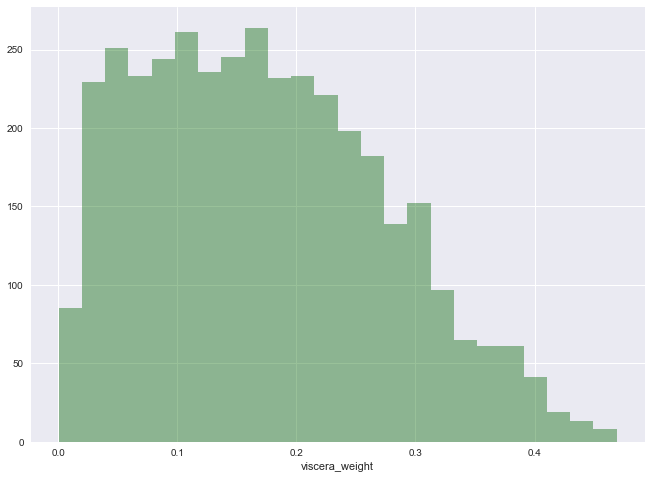

In [87]:
create_histogram(df['viscera_weight'], color='darkgreen')

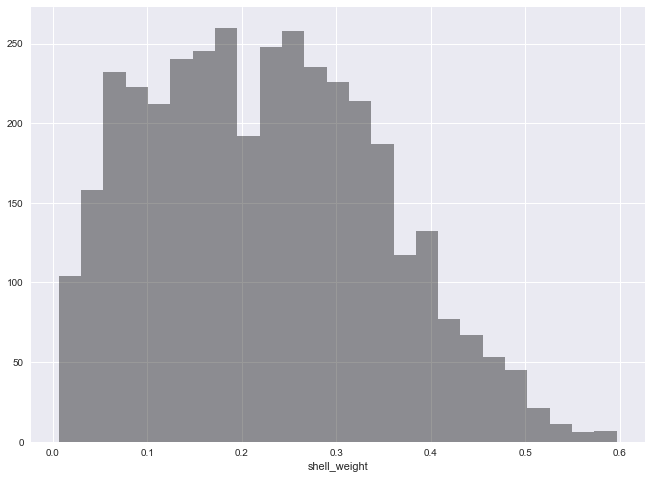

In [96]:
create_histogram(df['shell_weight'], color='black')